---
title: "Unaggregate your data, bust a quote and learn a thing about modern football"
author: "Elias Nema"
date: "2020-05-20"
categories: [analytics]
jupyter: python3
---

## Introduction
Somehow I've spent the last week looking at Man City stats.

It all started with this quote in the book about the [data and football](https://www.amazon.com/Football-Hackers-Science-Data-Revolution/dp/1788702050) that I'm reading now.

![](quote.jpg)

::: {.column-margin}

**Spoiler alert**: this proved to be wrong. But it triggered interest from my side. Man City is one of the most recognisable sides, but do they play that short?

:::

## A common pitfall

So I wanted to quickly double-check the fact. Which, turned out, to be not easy at all. Available data is either not complete or too aggregated, there is a shortage of reliable publicly available sources. For example, the [official premier league](https://www.premierleague.com/stats/top/clubs/att_obox_goal?se=79) site says that MC has scored 13 goals from outside the box during the 2017/18 season, but there is no information about distributions (the quote mentions only the first half of the season).

And here I fell in a very common mistake people make while working with data. It's always tempting to look at aggregated data to see patterns and trends. However, often you need the exact opposite: take one sample, study it, see if it makes sense, see if it contains data that you expect.

::: {.column-margin}

This is a great example of a very common mistake people make when working with data. It's always tempting to look at aggregated data to see patterns and trends. However, often you need the exact opposite: take one sample, study it, see if it makes sense, see if it contains data that you expect.

:::

In fact, to prove the quote wrong I needed just a single example of a goal that City has scored from outside the box during that part of the season. So after searching for the best strikes of the season on YouTube I found that the quote didn't hold up. Just take a look at this last-minute [wonder-strike from Sterling](https://www.youtube.com/watch?v=VVDJEVCUO3c).

So we've already proved the quote wrong simply by watching a couple of great football moments. 

## Going deeper
But now that we are in the topic, let's dig deeper. The best website that I was able to find to look at more granular data is [fbref](https://fbref.com/). There I took statistics on every shot Man City did during their last 3 Premier League seasons. We also have a distance for each shot.

### Visualising
Here and below I'll be taking into consideration only first halves of the seasons. First, because the quote was about that. Second, this would be enough to see the tactical changes over time. Third, data for the 2019/20 season is incomplete anyways.

Let's start with trying to understand if there is any significant difference between seasons.

![](histograms.png)

This visualisation is of little use here, but at least we can see some distinctions between seasons.

Let's quickly compute t-test statistics to get a numeric representation of it:

```
season 17/18 vs 18/19: Ttest_indResult(statistic=1.1348979627228202, pvalue=0.2568168035045629)
season 18/19 vs 19/20: Ttest_indResult(statistic=1.8185721011018878, pvalue=0.06943167359879912)
season 17/18 vs 19/20: Ttest_indResult(statistic=3.1215926762079387, pvalue=0.0018782472078475076)
```

::: {.column-margin}
This compounds to a huge difference from 2017 to 2019 seasons.
:::

Indeed, looks like there is a small but not very significant difference between 2017 and 2018, while a much bigger difference between 2018 and 2019. This compounds to a huge difference from 2017 to 2019 seasons.

Let's give this difference a better human interface.

### Stacked graph
One way to look at distribution differences would be a stacked bar graph. This graph quickly falls apart when the number of dimension grows, but is perfect for our use case.

![](stacked_graph.png)

It's not too detailed, but also very concise. And we clearly see that each season City is aiming to shoot more and from the closer range.

### Density graphs
If we want to look even closer we can go with density graphs.

![](density.png)

Wow, this tells a story now. A coincidence? I doubt that.


## Conclusion & learnings
I believe football evolves by learning more about itself. It's a known fact that teams have started optimising for shooting from positions with higher chance of scoring, which [translates into less long-ranged shots](https://totalfootballanalysis.com/article/xg-analysis-tactical-analysis-tactics).

Evolution of Man City from the season 2017 to 2019 shows that they indeed follow this trend of shooting from “better” positions. But does it make their game better? That's the question we can't objectively answer with data.

:::{.callout-tip}

## Some concise takeaways for the data folks

* Don't start with aggregated data. Firstly, make sure that single data points look reasonable.
* Compare distributions numerically using the t-test, Kolmogorov-Smirnov test, etc.
* Add a visual story by bucketing:
  * Histograms
  * Pivot histograms into a stacked chart for a different perspective
  * Go for density estimations for more details

:::

## Code

### Reading data

In [27]:
import numpy as np
import pandas as pd
from scipy import stats
city = pd.read_csv('man_city_17_18_19.csv')

In [28]:
city.head()

,Season,Matchday,Opponent,Minute,Player,Outcome,Distance,BodyPart,Notes,SCA1,SCA1Event,SCA2,SCA2Event
0,2017/18,1,Brighton & Hove Albion,4,Gabriel Jesus,Blocked,11,Right Foot,NaN,Fernandinho,Pass (Live),Kyle Walker,Pass (Live)
1,2017/18,1,Brighton & Hove Albion,9,Danilo,Off Target,21,Right Foot,NaN,David Silva,Pass (Live),Danilo,Pass (Live)
2,2017/18,1,Brighton & Hove Albion,14,Fernandinho,Off Target,10,Head,NaN,David Silva,Pass (Dead),NaN,NaN
3,2017/18,1,Brighton & Hove Albion,17,Kevin De Bruyne,Saved,27,Right Foot,Free kick,David Silva,Fouled,Fernandinho,Pass (Live)
4,2017/18,1,Brighton & Hove Albion,32,Kevin De Bruyne,Blocked,28,Right Foot,Free kick,David Silva,Fouled,Danilo,Pass (Live)


In [29]:
print(city.Season.value_counts())
print(city.Matchday.nunique())

2019/20    376
2018/19    346
2017/18    338
Name: Season, dtype: int64
19


Data only for two halves of two seasons. Getting shots per searson.

In [30]:
y17 = city.query("Season == '2017/18'")['Distance']
y18 = city.query("Season == '2018/19'")['Distance']
y19 = city.query("Season == '2019/20'")['Distance']

### Comparing two samples

In [31]:
from matplotlib import pyplot as plt
plt.style.use('Solarize_Light2')
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

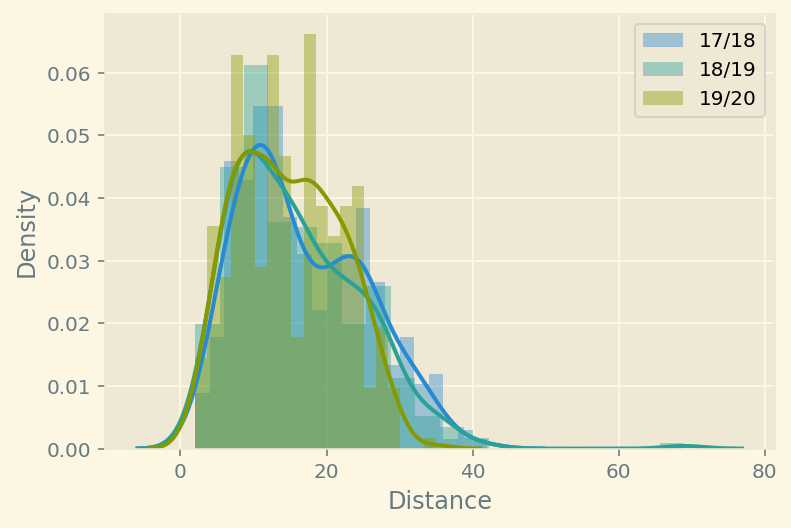

In [32]:
sns.distplot(y17, 20, label='17/18')
sns.distplot(y18, 20, label='18/19')
sns.distplot(y19, 20, label='19/20')
plt.legend()

In [33]:
y17.mean(), y17.std()

(16.701183431952664, 8.51091453670634)

In [34]:
y18.mean(), y18.std()

(15.95086705202312, 8.779779921952818)

In [35]:
y19.mean(), y19.std()

(14.872340425531915, 6.9627336279989995)

In [36]:
# equal_var=False to perform welch's test instead, because of different variance and amount of sample
print(f'season 17/18 vs 18/19: {stats.ttest_ind(y17,y18, equal_var=False)}')
print(f'season 18/19 vs 19/20: {stats.ttest_ind(y18,y19, equal_var=False)}')
print(f'season 17/18 vs 19/20: {stats.ttest_ind(y17,y19, equal_var=False)}')

season 17/18 vs 18/19: Ttest_indResult(statistic=1.1348979627228202, pvalue=0.2568168035045629)
season 18/19 vs 19/20: Ttest_indResult(statistic=1.8185721011018878, pvalue=0.06943167359879913)
season 17/18 vs 19/20: Ttest_indResult(statistic=3.1215926762079387, pvalue=0.001878247207847508)


Looks like there is a high chance of difference between them.

### Density distribution

In [37]:
kde17 = stats.gaussian_kde(y17)
kde18 = stats.gaussian_kde(y18)
kde19 = stats.gaussian_kde(y19)
grid = np.linspace(0,50, 51)


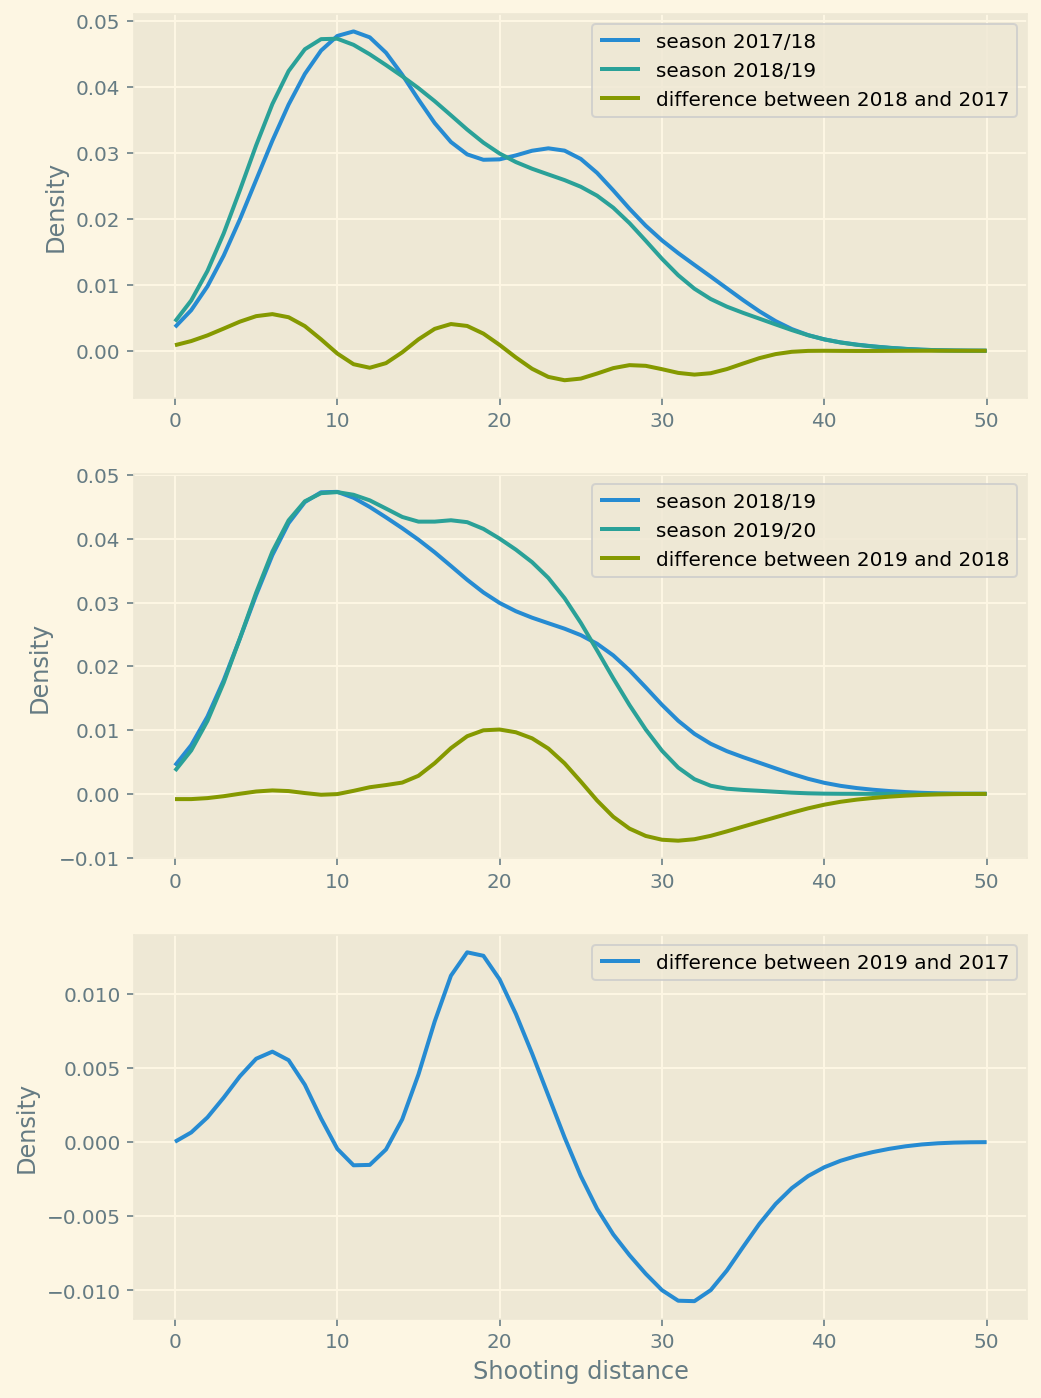

In [38]:
f, axs = plt.subplots(3,1, figsize=(8,12))

axs[0].plot(grid, kde17(grid), label="season 2017/18")
axs[0].plot(grid, kde18(grid), label="season 2018/19")
axs[0].plot(grid, kde18(grid)-kde17(grid), label="difference between 2018 and 2017")

axs[1].plot(grid, kde18(grid), label="season 2018/19")
axs[1].plot(grid, kde19(grid), label="season 2019/20")
axs[1].plot(grid, kde19(grid)-kde18(grid), label="difference between 2019 and 2018")

# axs[2].plot(grid, kde17(grid), label="season 2017/18")
# axs[2].plot(grid, kde19(grid), label="season 2019/20")
axs[2].plot(grid, kde19(grid)-kde17(grid), label="difference between 2019 and 2017")

for ax in axs:
    ax.set(ylabel='Density')
    ax.legend()

axs[2].set(xlabel='Shooting distance')
plt.show()

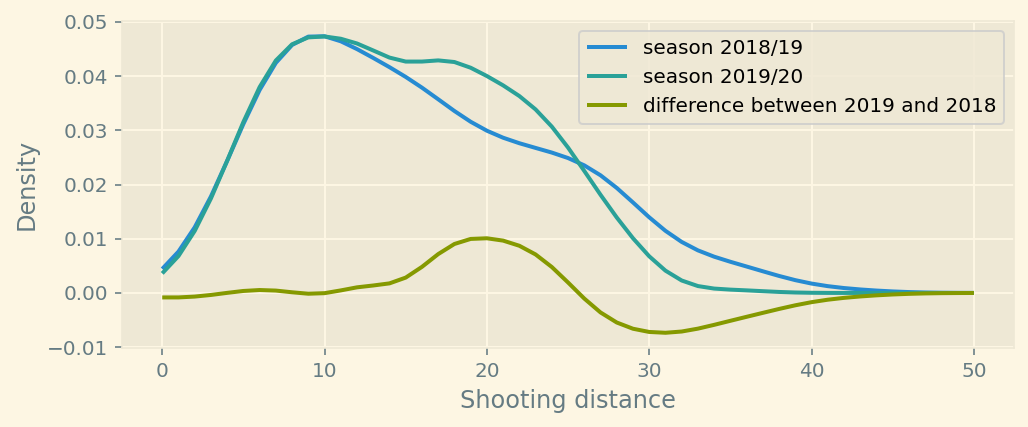

In [39]:
plot = plt.figure(figsize=(8,3))
plt.plot(grid, kde18(grid), label="season 2018/19", figure=plot)
plt.plot(grid, kde19(grid), label="season 2019/20", figure=plot)
plt.plot(grid, kde19(grid)-kde18(grid), label="difference between 2019 and 2018")
plt.xlabel('Shooting distance')
plt.ylabel('Density')
plt.legend()
plt.show()

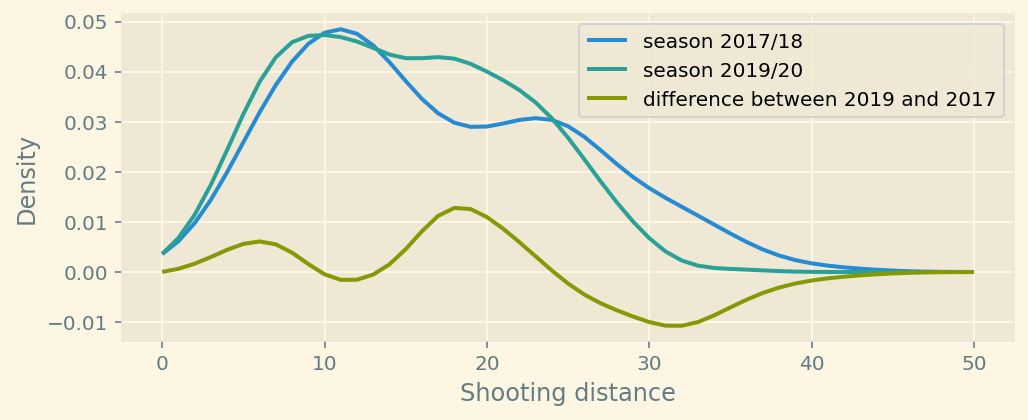

In [40]:
plot = plt.figure(figsize=(8,3))
plt.plot(grid, kde17(grid), label="season 2017/18", figure=plot)
plt.plot(grid, kde19(grid), label="season 2019/20", figure=plot)
plt.plot(grid, kde19(grid)-kde17(grid), label="difference between 2019 and 2017")
plt.xlabel('Shooting distance')
plt.ylabel('Density')
plt.legend()
plt.show()

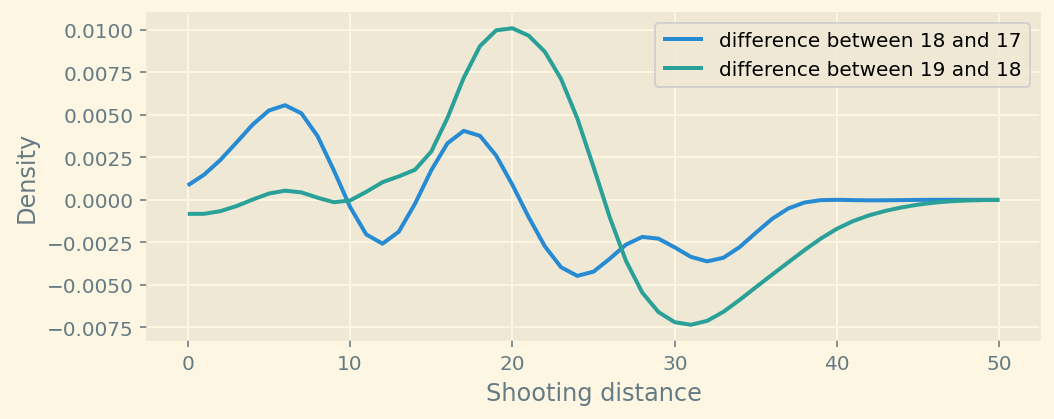

In [41]:
plot = plt.figure(figsize=(8,3))
plt.plot(grid, kde18(grid)-kde17(grid), label="difference between 18 and 17", figure=plot)
plt.plot(grid, kde19(grid)-kde18(grid), label="difference between 19 and 18")
# plt.plot(grid, kde19(grid)-kde17(grid), label="difference between 19 and 17")
plt.xlabel('Shooting distance')
plt.ylabel('Density')
plt.legend()
plt.show()

You can see the difference after plotting estimated densities. 

Manchester City has started shooting more from the 5-10 and 15-20 yards range. They shoot less from > 30 yards.

Text(0.5, 1.0, 'a-b')

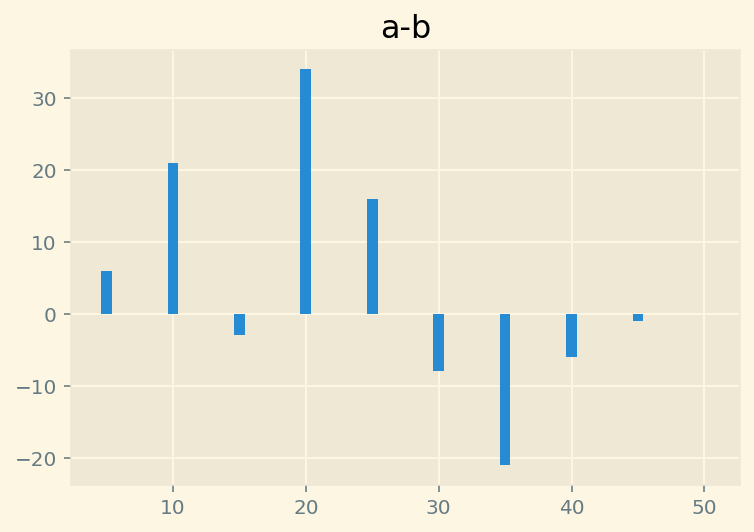

In [42]:
diff=plt.bar(range(5,51,5), 
             height=(np.histogram(y19,bins=10, range=(0,50))[0] - np.histogram(y17,bins=10, range=(0,50))[0])
             ) 
plt.title("a-b")

Here is the difference between histograms.

In [43]:
df=pd.DataFrame([
        np.histogram(y17,5,(0,50))[0] / y17.count() * 100,
        np.histogram(y18,5,(0,50))[0] / y18.count() * 100,
        np.histogram(y19,5,(0,50))[0] / y19.count() * 100
        ], index=['2017','2018','2019'], columns=['0-10','10-20','20-30','30-40','40-50'])

In [44]:
city['Distance bins'] =  pd.cut(city['Distance'], bins=[0,10,20,30,40,50])

In [45]:
df1 = city[['Season', 'Distance bins','Distance']].groupby(by=['Season','Distance bins'],).agg('count').unstack()

In [46]:
df1.columns = ['(0, 10]','(10, 20]','(20, 30]','(30, 40]','(40, 50]']

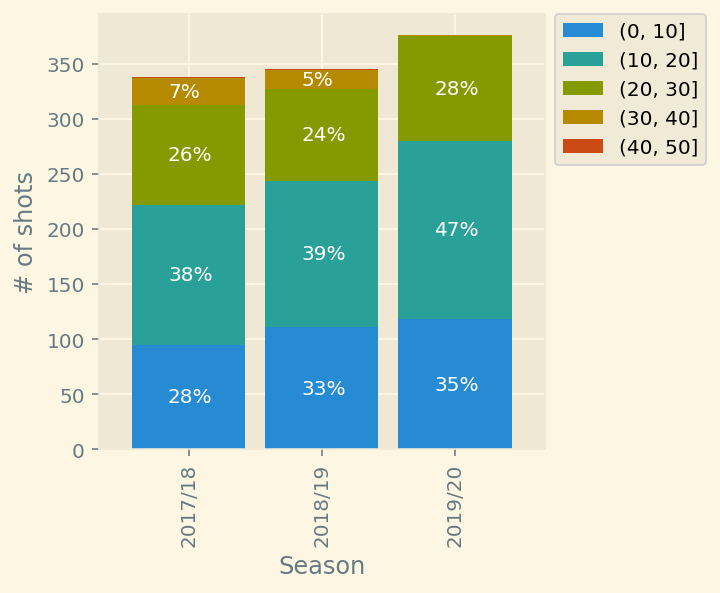

In [47]:
ax = df1.plot(kind='bar', stacked=True,width=.85, figsize=(4,4))
ax.set(ylabel='# of shots')
ax.legend(bbox_to_anchor=(1, 1.025))

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    pct = height/df1.iloc[i//5].sum()
    if pct > .04:
        ax.annotate('{:.0%}'.format(pct), (x+.27, y + height/2 -5 ), color='white', fontsize=10,)


In [48]:
pd.DataFrame([(df1.loc['2017/18']/df1.loc['2017/18'].sum()).T,
(df1.loc['2018/19']/df1.loc['2018/19'].sum()).T,
(df1.loc['2019/20']/df1.loc['2019/20'].sum()).T])

,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]"
2017/18,0.281065,0.375740,0.269231,0.071006,0.002959
2018/19,0.321739,0.385507,0.240580,0.049275,0.002899
2019/20,0.313830,0.430851,0.252660,0.002660,0.000000


In [49]:
df1

,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]"
Season,,,,,
2017/18,95,127,91,24,1
2018/19,111,133,83,17,1
2019/20,118,162,95,1,0
